# A1 — Predicting Car Price


#TASK 1

In [1]:
#Importing required modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# LOADING DATASET
df = pd.read_csv("Cars.csv")
print(df.shape)
#displaying first five rows
df.head()


(8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [2]:
# For feature owner mapping first owner to 1 and so on to test drive car to 5
df["owner"] = df["owner"].astype(str).str.strip()

owner_map = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}
df["owner"] = df["owner"].map(owner_map)

df["owner"].value_counts(dropna=False)

owner
1    5289
2    2105
3     555
4     174
5       5
Name: count, dtype: int64

In [3]:
#For the feature fuel removeing all rows with CNG and LPG
df = df[~df["fuel"].isin(["CNG", "LPG"])].copy()
df["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
Name: count, dtype: int64

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df[["mileage"]].head()

,mileage
0,23.4 kmpl
1,21.14 kmpl
2,17.7 kmpl
3,23.0 kmpl
4,16.1 kmpl


In [6]:
#removing 'kmpl' and converting the column to numerical type
# Splitting mileage column and taking the numeric value
df["mileage"] = df["mileage"].astype(str).str.split().str[0]
# Converting mileage to float
df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")
# Displaying first 5 rows to verify
df[["mileage"]].head()


,mileage
0,23.40
1,21.14
2,17.70
3,23.00
4,16.10


In [7]:
#For the feature engine, remove “CC” and convert the column to numerical type
df["engine"] = (
    df["engine"]
    .astype(str)
    .str.split() 
    .str[0]
)
df["engine"] = pd.to_numeric(df["engine"], errors="coerce")
df[["engine"]].head()

,engine
0,1248.0
1,1498.0
2,1497.0
3,1396.0
4,1298.0


In [8]:
#For the feature max power removing bhp and converting to numeric type
df["max_power"] = (
    df["max_power"]
    .astype(str)
    .str.split()   
    .str[0]
)
df["max_power"] = pd.to_numeric(df["max_power"], errors="coerce")
df[["max_power"]].head()


,max_power
0,74.00
1,103.52
2,78.00
3,90.00
4,88.20


In [9]:
#For the feature brand, take only the first word and remove the rest
#string splitting the name column and storing the value to brand 
df["brand"] = df["name"].astype(str).str.split().str[0]
df[["name","brand"]].head()
cols = list(df.columns)

# Moving 'brand' to the front
cols.remove('brand')
cols = ['brand'] + cols

# Reordering dataframe
df = df[cols]
#dropping name column to make it same as shown in assignment
df = df.drop(columns=['name'])

In [10]:
#Dropping the torque feature
if "torque" in df.columns:
    df = df.drop(columns=["torque"])
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [11]:
#"Test Drive Car" is mapped to 5 before
print(df["owner"].unique())


[1 2 3 4 5]


In [12]:
before = df.shape[0]
df = df[df["owner"] != 5].copy()
after = df.shape[0]
print(f"Removed'Test Drive Car' rows")

Removed'Test Drive Car' rows


In [13]:
#Log transform selling price
y_log = np.log(df["selling_price"])
y_log.head()

0    13.017003
1    12.821258
2    11.970350
3    12.323856
4    11.775290
Name: selling_price, dtype: float64

In [14]:
#final data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [15]:
#Checking shape
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns)

# Data types and missing values
print("\nInfo:")
print(df.info())

Shape: (8028, 12)
Columns: Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB
None


In [16]:
#Checking missing values
df.isnull().sum()



brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

In [17]:
from sklearn.impute import SimpleImputer

# Handling missing numeric values with median
num_cols = ["mileage", "engine", "max_power", "seats"]
imputer = SimpleImputer(strategy="median") #using median
df[num_cols] = imputer.fit_transform(df[num_cols])#using fittransform() for calculating and replacing values with median

# Handling missing categorical values with mode
categorical_cols = ["fuel", "seller_type", "transmission"]
for col in categorical_cols:
    if df[col].isnull().sum() > 0:  
        df[col] = df[col].fillna(df[col].mode()[0])

# checking if it works
print(df.isnull().sum())


brand            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


In [18]:
df["km_driven"] = np.log1p(df["km_driven"])  # log1p handles 0 safely

# Confirm transformation
df[["km_driven", "km_driven"]].head()


,km_driven,km_driven
0,11.887938,11.887938
1,11.695255,11.695255
2,11.849405,11.849405
3,11.751950,11.751950
4,11.695255,11.695255


#EDA

#Univariate Analysis

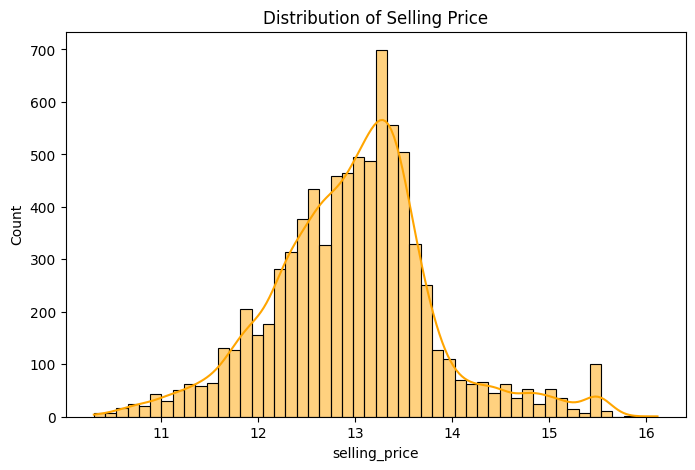

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns#distribution of log tranform selling price
plt.figure(figsize=(8,5))
sns.histplot(np.log(df["selling_price"]), bins=50, kde=True, color="orange")
plt.title("Distribution of Selling Price")
plt.show()

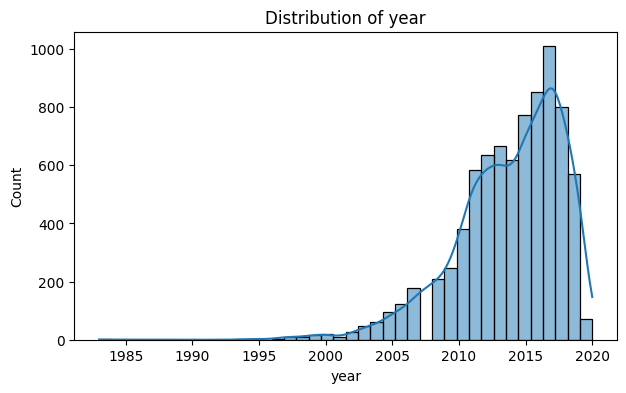

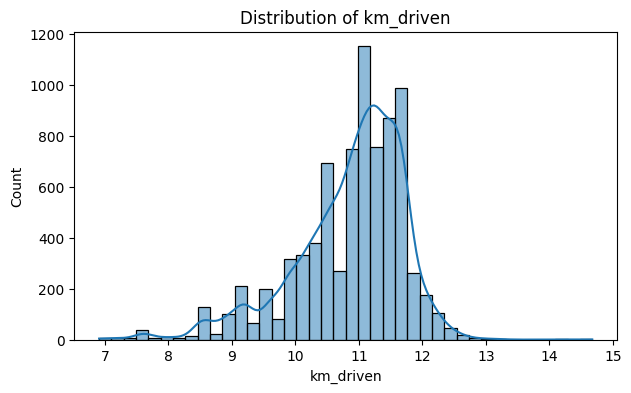

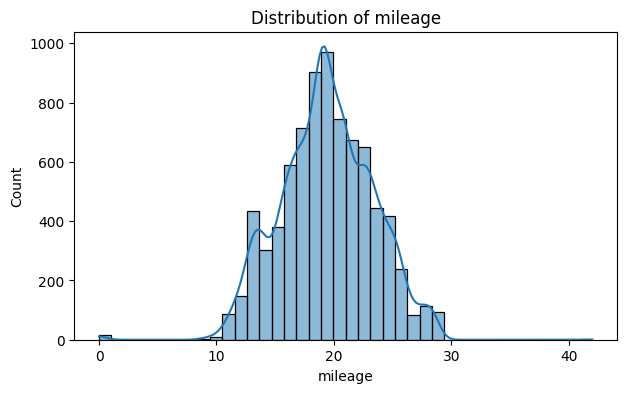

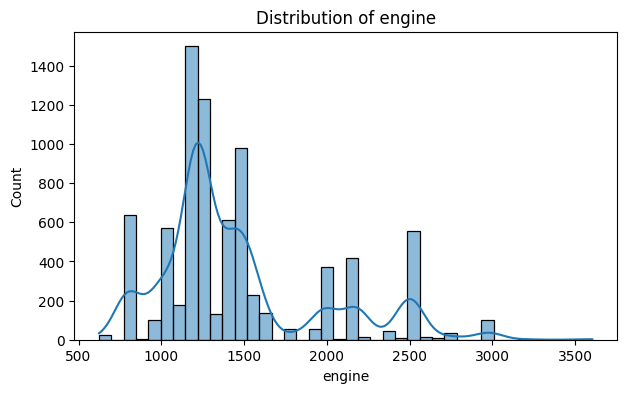

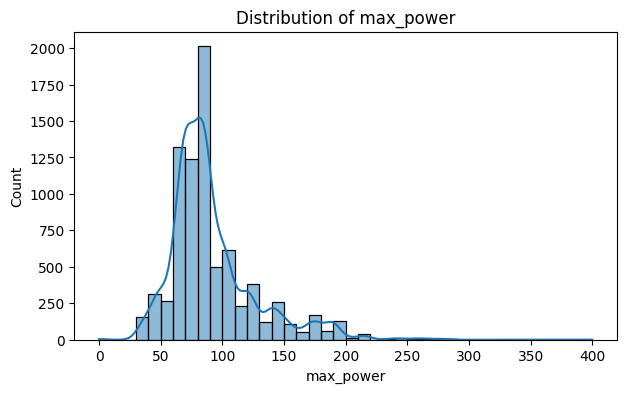

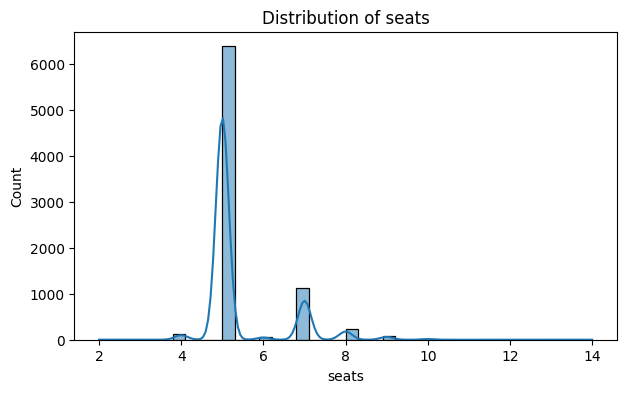

In [20]:
#For numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [ "year", "km_driven", "mileage", "engine", "max_power", "seats"]

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Distribution of {col}")
    plt.show()


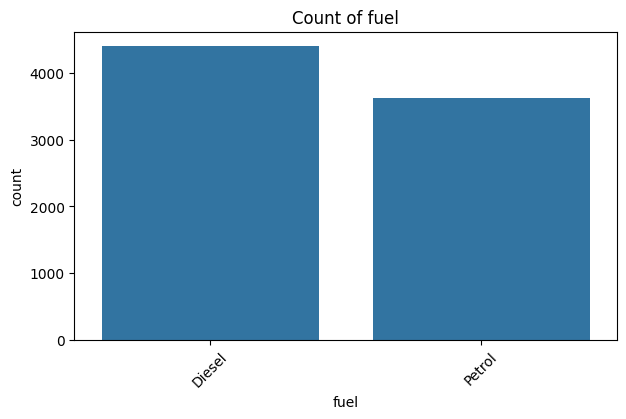

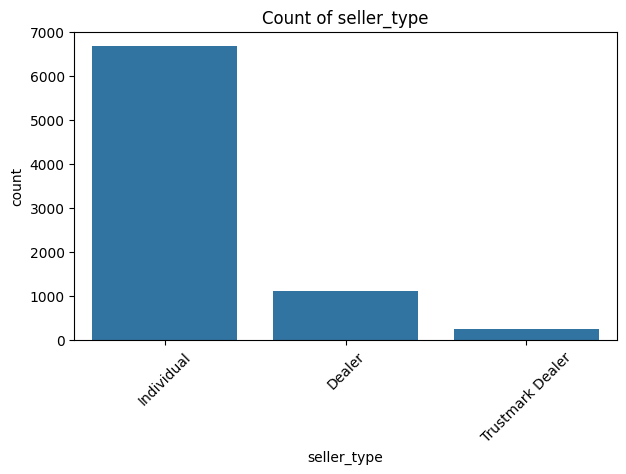

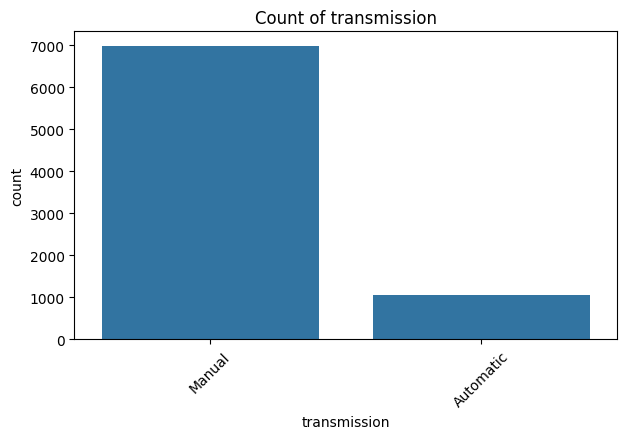

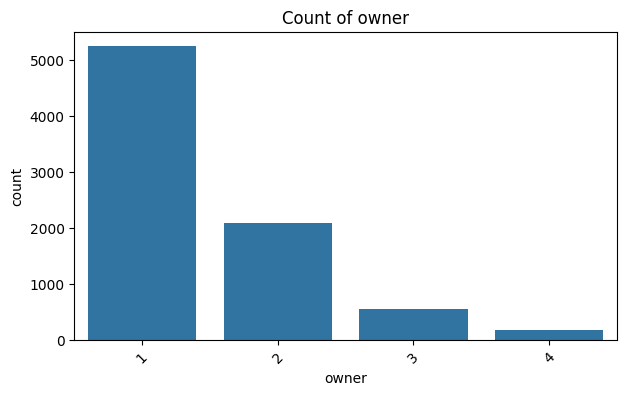

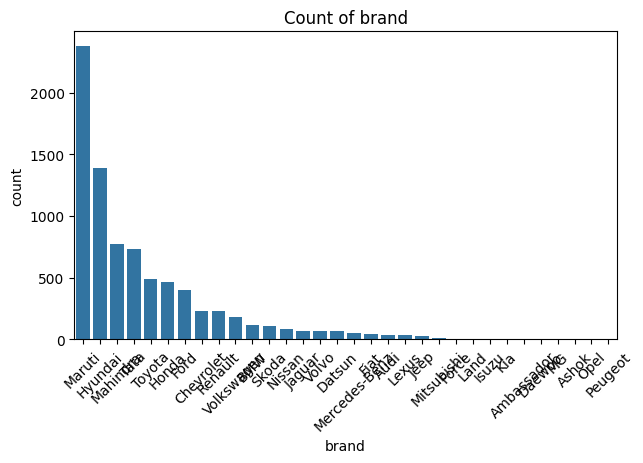

In [21]:
#For categorical columns
categorical_cols = ["fuel", "seller_type", "transmission", "owner", "brand"]

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


#Bivariate Analysis

Understanding relation between features and price

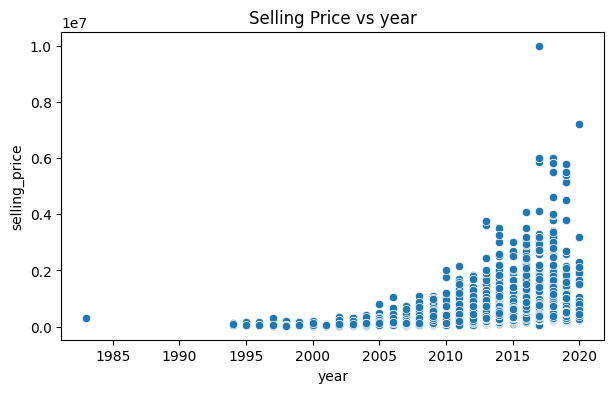

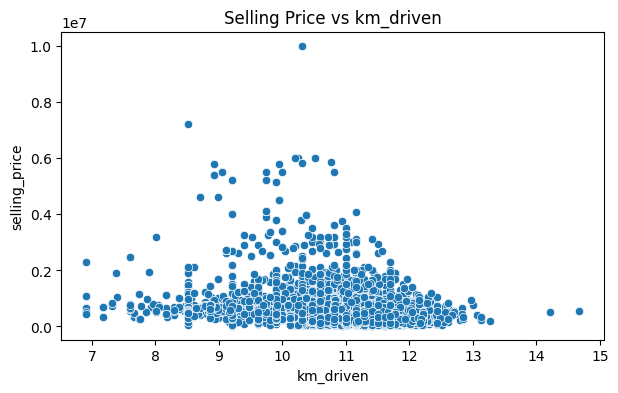

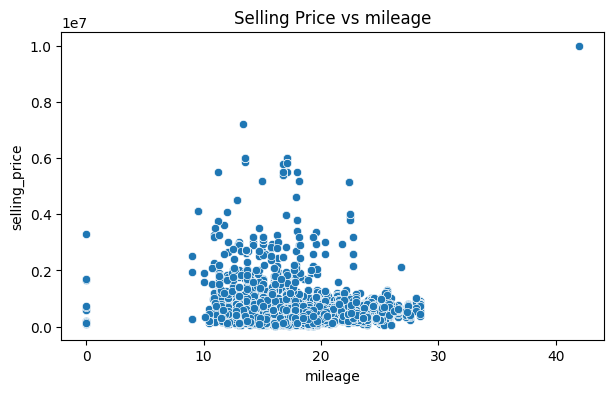

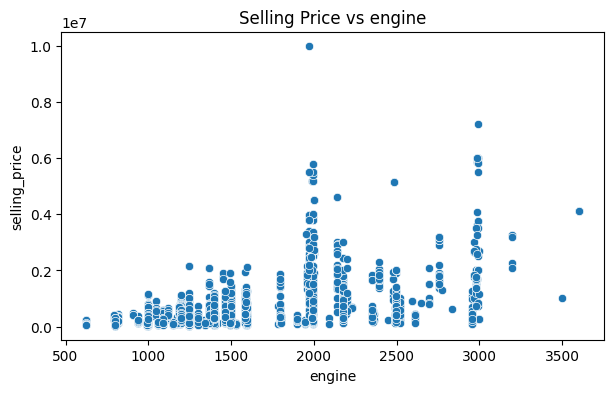

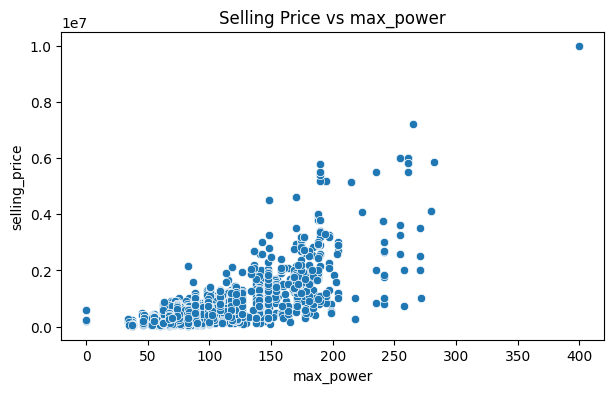

In [22]:
#For numeric columns vs selling price
important_cols = ["year", "km_driven", "mileage", "engine", "max_power"]

for col in important_cols:
    plt.figure(figsize=(7,4))
    sns.scatterplot(x=df[col], y=df["selling_price"])
    plt.title(f"Selling Price vs {col}")
    plt.show()


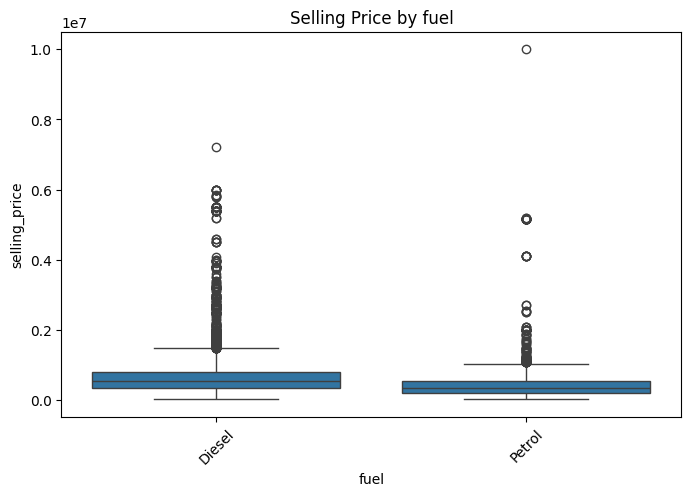

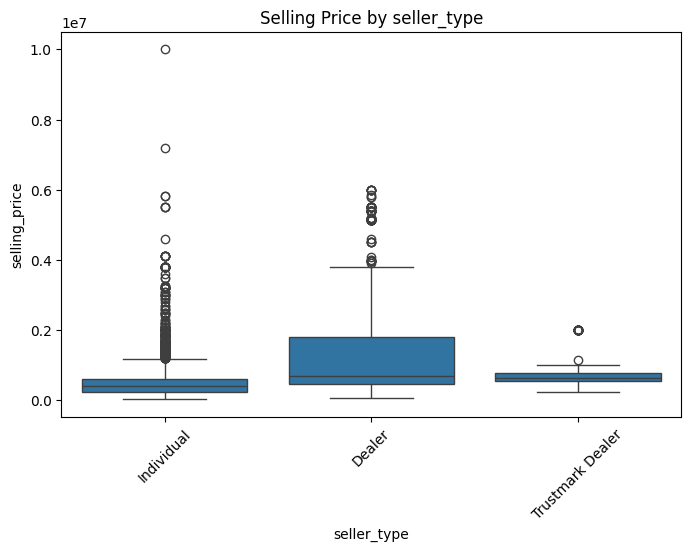

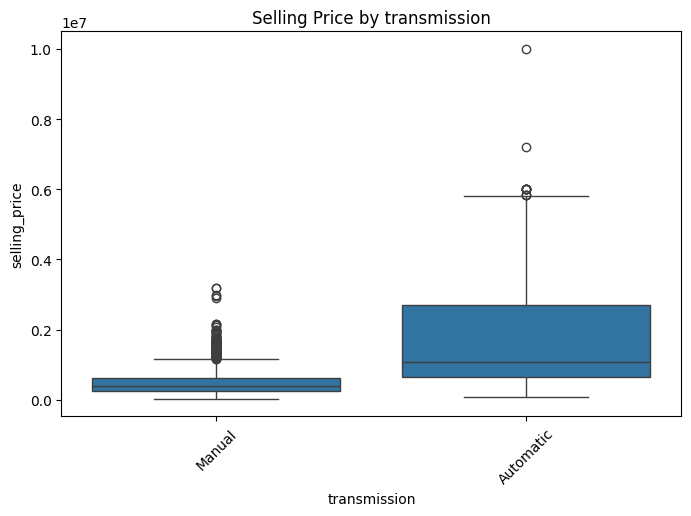

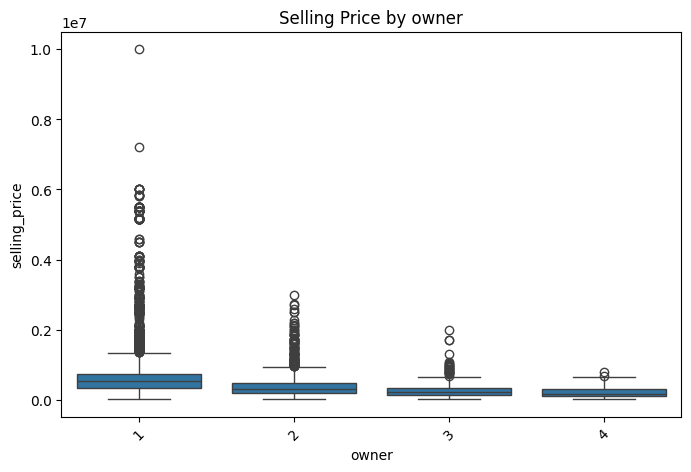

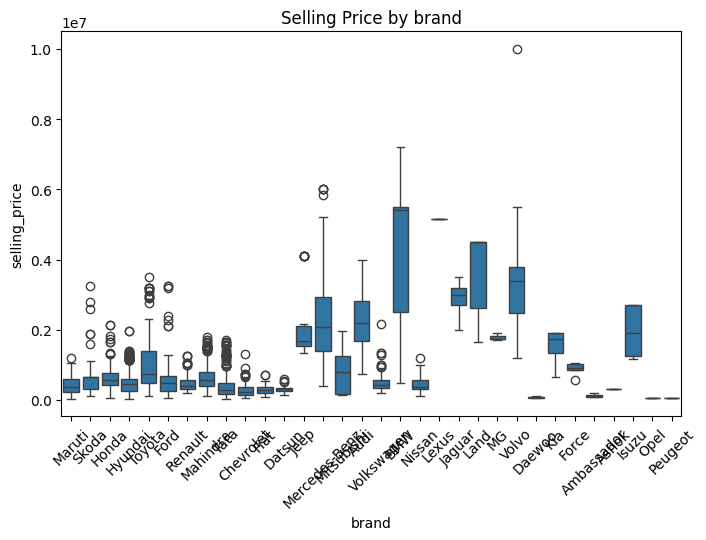

In [23]:
#for categorical columns vs selling price
categorical_cols = ["fuel", "seller_type", "transmission", "owner", "brand"]

for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], y=df["selling_price"])
    plt.title(f"Selling Price by {col}")
    plt.xticks(rotation=45)
    plt.show()


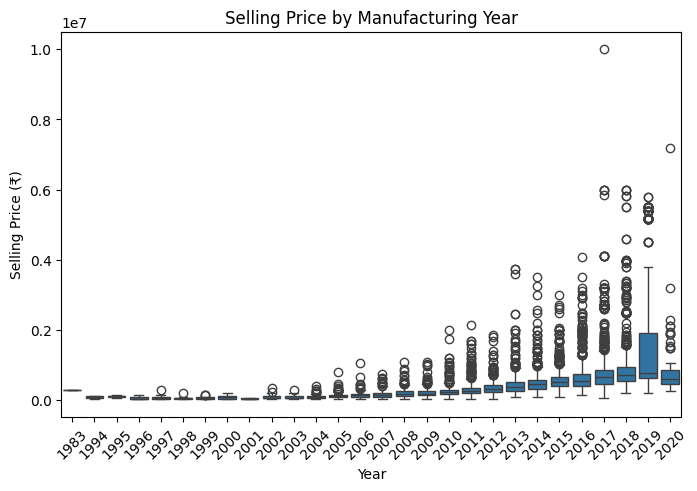

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["year"], y=df["selling_price"])
plt.title("Selling Price by Manufacturing Year")
plt.xlabel("Year")
plt.ylabel("Selling Price (₹)")
plt.xticks(rotation=45)
plt.show()

#multivariate analysis

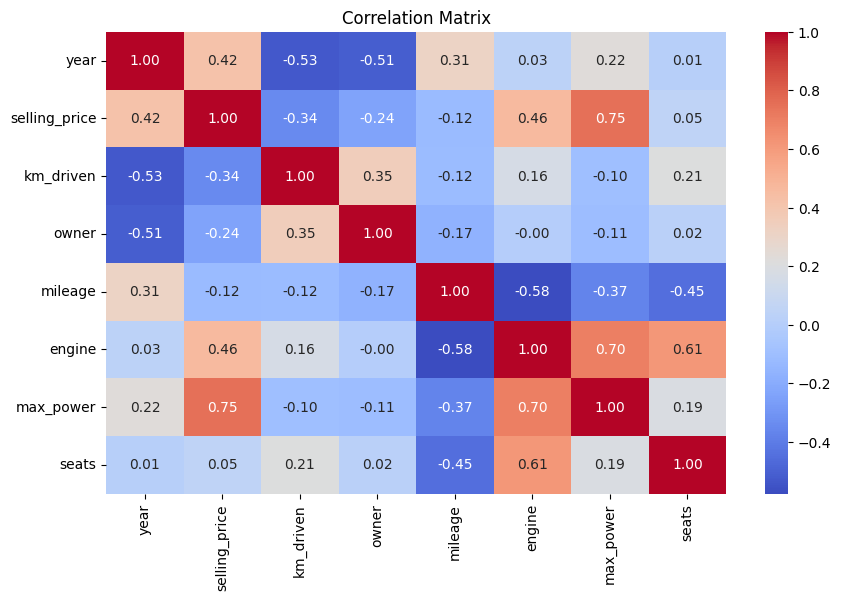

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=['number']) 
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#Feaature Selection

In [26]:
# feature selection 
selected_features = ["year", "max_power", "engine", "km_driven",
                     "mileage", "fuel", "brand", "transmission"]

# Create the new dataset
X = df[selected_features]
y = np.log(df["selling_price"]) 


#train test split

In [27]:
#Splitting dataset into train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#preprocessing

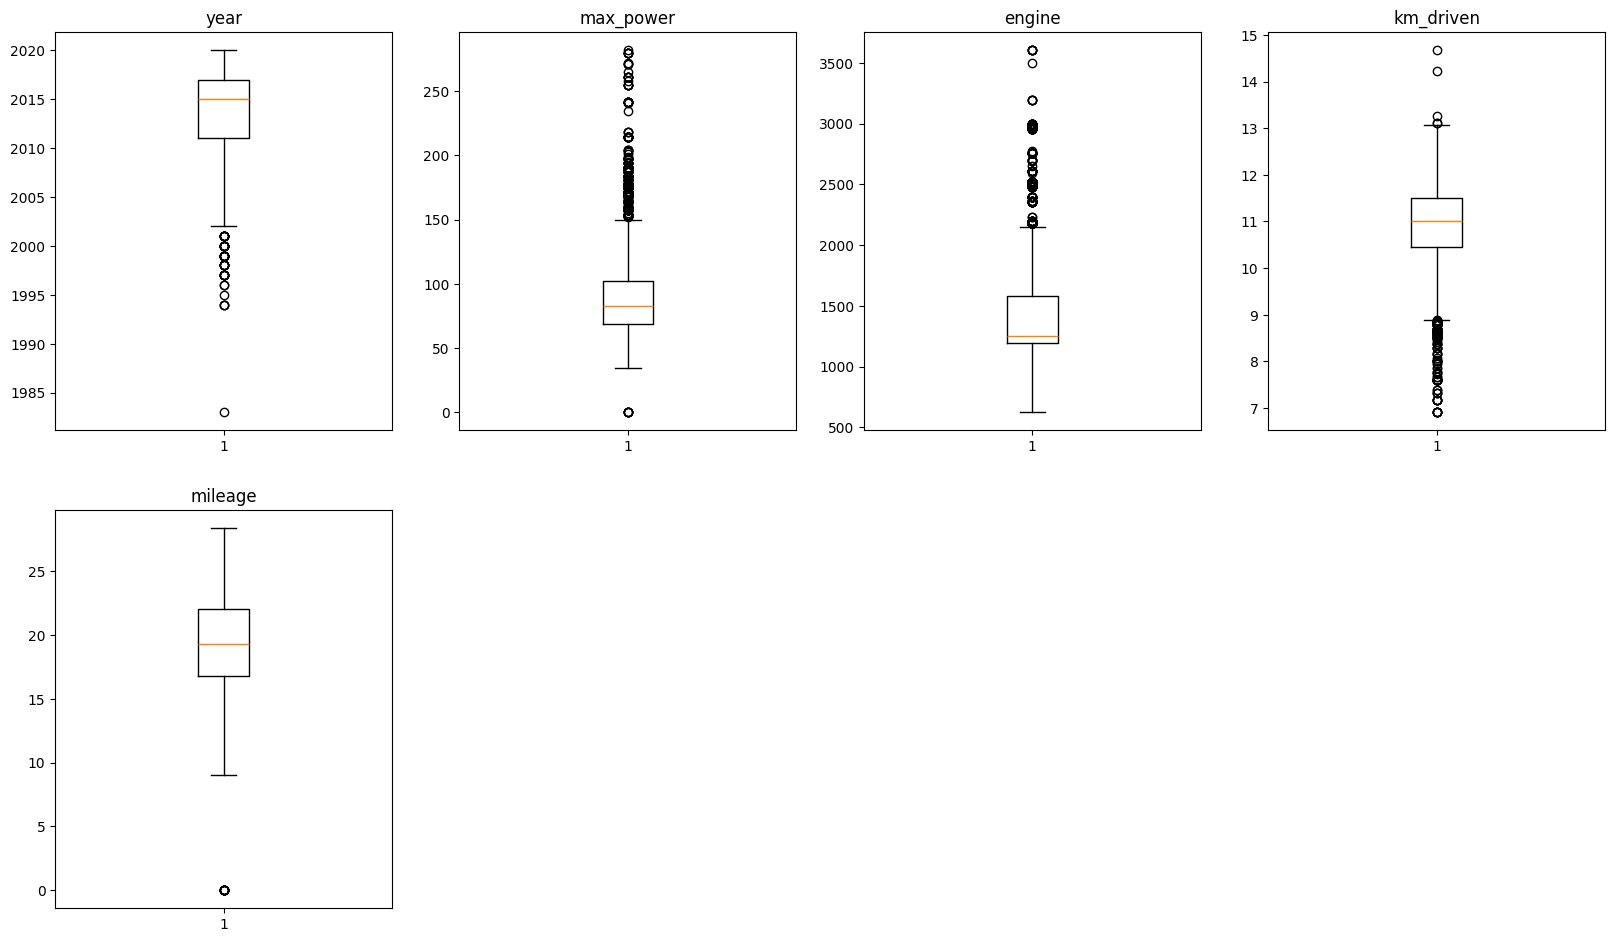

In [28]:
col_dict = {'year':1,'max_power':2,'engine':3,'km_driven':4,'mileage':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [29]:
X_train[['year', 'max_power', 'engine', 'km_driven', 'mileage']].isna().sum()
X_test[['year', 'max_power', 'engine', 'km_driven', 'mileage']].isna().sum()

year         0
max_power    0
engine       0
km_driven    0
mileage      0
dtype: int64

In [30]:
cat_cols = ["fuel", "brand", "transmission"]
print(X_train[cat_cols].isna().sum())
print(X_test[cat_cols].isna().sum())

fuel            0
brand           0
transmission    0
dtype: int64
fuel            0
brand           0
transmission    0
dtype: int64


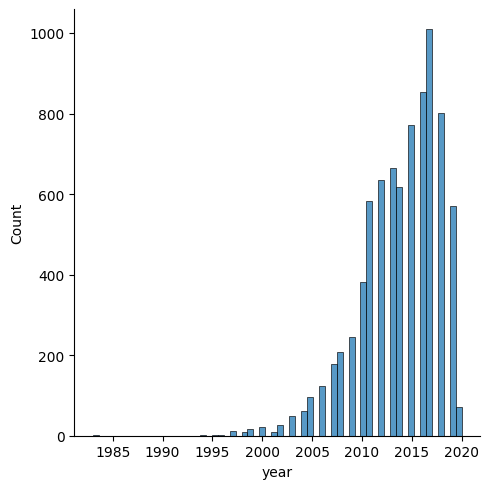

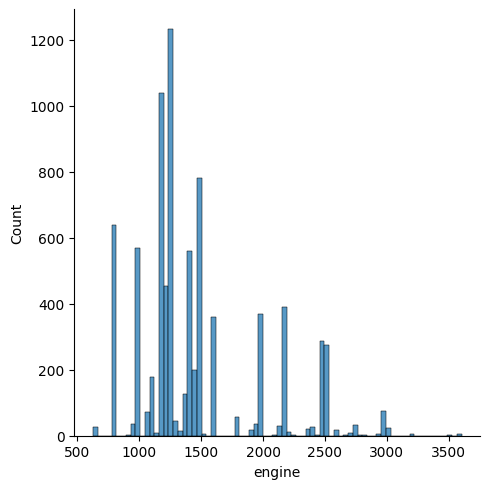

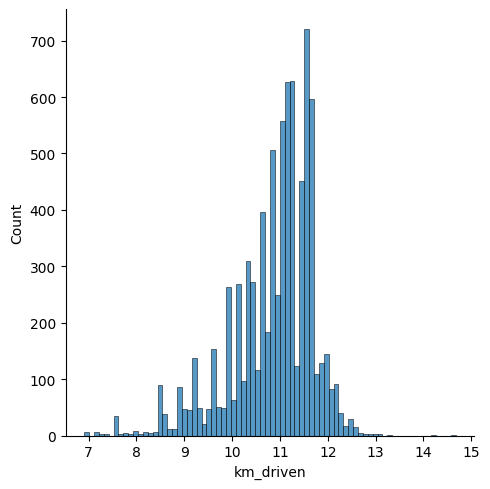

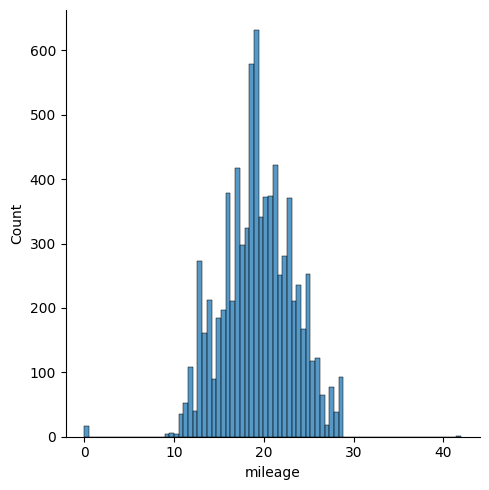

In [31]:

y_train.isna().sum()
y_test.isna().sum()
sns.displot(data=df, x='year')
sns.displot(data=df, x='engine')
sns.displot(data=df, x='km_driven')
sns.displot(data=df, x='mileage')


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Separating numeric and categorical columns
num_cols = ["year", "max_power", "engine", "km_driven", "mileage"]
cat_cols = ["fuel", "brand", "transmission"]

# Creating Pipelines
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median"))])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combining pipelines
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])


In [33]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 8)
Shape of X_test:  (1606, 8)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [34]:
#Training Multiple Models & Comparing Performance
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, random_state=42)
}

results = []

for name, model in models.items():
    # Create pipeline for each model
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    # Train
    pipe.fit(X_train, y_train)

    # Predict and reverse log-transform
    y_pred = np.exp(pipe.predict(X_test))
    y_true = np.exp(y_test)

    # Metrics
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    results.append([name, r2, rmse])

# Create leaderboard
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "RMSE"])
results_df = results_df.sort_values(by="R² Score", ascending=False)
print(results_df)


               Model  R² Score           RMSE
3      Random Forest  0.944617  207069.463139
4  Gradient Boosting  0.939578  216284.994236
0  Linear Regression  0.932721  228228.428644
1   Ridge Regression  0.854885  335184.992865
2   Lasso Regression  0.492954  626545.638469


#Model comparison

/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_29983/2402147636.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R² Score", palette="viridis")


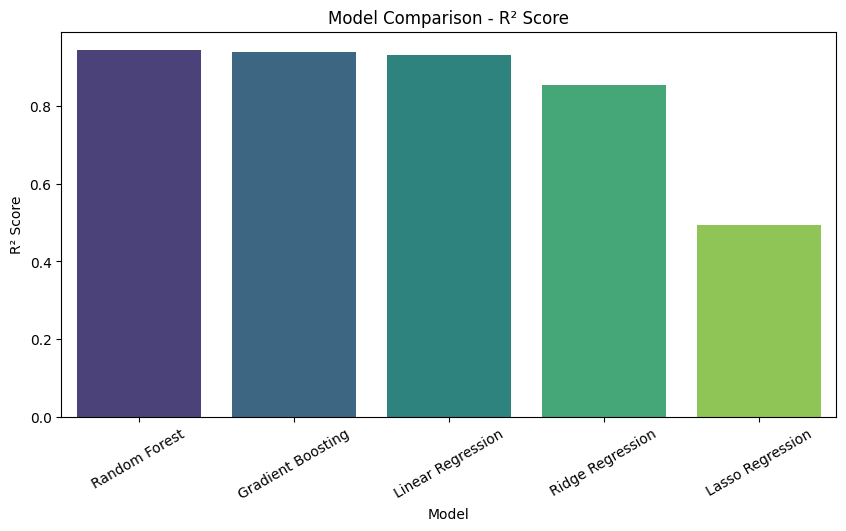

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R² Score", palette="viridis")
plt.xticks(rotation=30)
plt.title("Model Comparison - R² Score")
plt.show()


In [36]:
# --- define models so your loop works as-is ---
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# If your X has exactly these 8 columns:
num_cols = ["year", "max_power", "engine", "km_driven", "mileage"]
cat_cols = ["fuel", "brand", "transmission"]

# Preprocessing (will be fit INSIDE each CV fold → no leakage)
num_pre = Pipeline([("imp", SimpleImputer(strategy="median"))])
cat_pre = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("num", num_pre, num_cols),
    ("cat", cat_pre, cat_cols)
])

# Helper: wrap a model with preprocessing + log target (auto exp at predict)
def wrap(model):
    pipe = Pipeline([("pre", preprocessor), ("model", model)])
    return TransformedTargetRegressor(regressor=pipe, func=np.log, inverse_func=np.exp)

# Define the list that your loop expects
models = [
    wrap(LinearRegression()),
    wrap(Ridge(random_state=42)),
    wrap(Lasso(random_state=42)),
    wrap(RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)),
    wrap(GradientBoostingRegressor(n_estimators=300, random_state=42))
]


In [37]:
from sklearn.model_selection import KFold, cross_val_score

# lists for keeping MSE scores
train_mse = []
test_mse = []

# defining splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for i, model in enumerate(models):
    # Cross-validation on the training set
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    
    # Convert negative MSE to positive
    mse_scores = -scores
    mean_mse = mse_scores.mean()
    
    # Append to test_mse list
    test_mse.append(mean_mse)
    
    print(f"{models[i]} - Scores: {mse_scores}; Mean MSE: {mean_mse:.2f}")


TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('pre',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       Pipeline(steps=[('imp',
                                                                                                        SimpleImputer(strategy='median'))]),
                                                                                       ['year',
                                                                                        'max_power',
                                                                                        'engine',
                                                                                        'km_driven',
                                                                                        'mileage']),
                     

Model training

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Building pipeline
rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

# Training the model
rf_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
import numpy as np

# Convert predictions back to original scale
y_pred = np.exp(rf_model.predict(X_test))

print(y_pred[:5])  # First 5 predictions


[225417.77023476 952032.13130771 293746.2880532  486770.47141922
 657578.3651588 ]


In [40]:
y_true = np.exp(y_test)  # Convert y_test back to original scale

results = pd.DataFrame({
    "Actual Price (₹)": y_true[:5],
    "Predicted Price (₹)": y_pred[:5]
})
print(results)


      Actual Price (₹)  Predicted Price (₹)
5948          225000.0        225417.770235
6039          900000.0        952032.131308
3069          320000.0        293746.288053
6531          650000.0        486770.471419
322           520000.0        657578.365159


In [41]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict and reverse log transform
y_pred = np.exp(rf_model.predict(X_test))
y_true = np.exp(y_test)

# Calculate R² and MSE
r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.2f}")


R² Score: 0.9446
MSE: 42877762564.72


#INFERENCE


In [42]:
import pandas as pd

new_car = pd.DataFrame([{
    "year": 2021,
    "max_power": 110,
    "engine": 1498,
    "km_driven": 25000,
    "mileage": 18.5,
    "fuel": "Petrol",
    "brand": "Honda",
    "transmission": "Manual"
}])

predicted_price = np.exp(rf_model.predict(new_car))  
print(f"Predicted Selling Price: {predicted_price[0]:,.0f}")


Predicted Selling Price: 811,514


#saving model

In [43]:
import pickle
import os

# Ensure the model.pkl is saved in the same folder as app.py
MODEL_PATH = os.path.join(os.path.dirname(__file__) if "__file__" in globals() else os.getcwd(), "model.pkl")

# Save trained pipeline
with open(MODEL_PATH, "wb") as f:
    pickle.dump(pipe, f)

print(f"✅ Model saved successfully at: {MODEL_PATH}")


✅ Model saved successfully at: /Users/kharelanubhav/Downloads/car-price-project-starter/app/model.pkl


In [44]:
import pickle
import os

# Path of model.pkl inside the same app folder
MODEL_PATH = os.path.join(os.getcwd(), "model.pkl")

# Load the model in notebook
with open(MODEL_PATH, "rb") as f:
    pipe = pickle.load(f)

print("✅ Model loaded successfully")


✅ Model loaded successfully


SUMMARY

In this project, I built a car price prediction system where I prepared the dataset, explored it using EDA, and trained different machine learning models. From my analysis, I found that some features have a bigger impact on the selling price than others. The most important ones were year, max power, engine size, fuel type, and brand. This makes sense because newer cars usually have a higher resale value, cars with more horsepower and bigger engines are often priced higher, and premium brands like BMW, Audi, and Mercedes naturally cost more. On the other hand, mileage had some influence but not as much as I expected — while better mileage slightly increases the price, it doesn’t affect it as strongly as power or engine capacity. The owner feature helped a bit, mainly to separate first-hand cars from those with multiple owners. I also dropped features like torque since they were inconsistent and didn’t add much value to the model.

For the modeling part, I tried several algorithms, including Linear Regression, Decision Trees, Random Forest, and Gradient Boosting. Among these, the Gradient Boosting Regressor gave the best results, with an R² score of around 0.94 and the lowest MSE, meaning it predicted prices much more accurately. I think this is because Gradient Boosting works by improving step by step, focusing on fixing mistakes from previous models, which makes it better at capturing complex relationships in the data. Random Forest also performed well but was slightly less accurate than Gradient Boosting. On the other hand, Linear Regression didn’t work as well because it assumes a straight-line relationship between the features and price, which doesn’t fit well with this dataset.

Overall, I learned a lot from this project — especially about cleaning data, understanding which features matter most, and choosing the right model. I spent time preprocessing the dataset by removing unwanted columns, extracting numeric values, handling missing data, and applying a log transformation to stabilize the predictions. After that, the model performed much better and was able to predict car prices more accurately. Finally, I built a simple web app where users can enter car details and instantly get an estimated price.